# ***Covid-19 Unemployement Analysis***

In [46]:
import datetime as dt
import calendar
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/T2.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# ***Pre-Processing of Data***

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [48]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [49]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [50]:
print(df.shape)

(768, 7)


In [51]:
df=df.dropna()

In [52]:
print(df.shape)

(740, 7)


In [53]:
df.columns=['State','Date','Frequency','UnemployementRate','Employed','LabourPartRate','Area']
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df['year_month']=df['Date'].dt.to_period('M')
#maximum unemployement rate every month
def max_un_mon():
  grouped=df.groupby('year_month')
  results=[]
  for name,group in grouped:
    max_row=group.loc[group['UnemployementRate'].idxmax()]
    states=max_row['State']
    results.append((name,states))
  result_df=pd.DataFrame(results,columns=['Year_Month','State'])
  print(result_df)
max_un_mon()

   Year_Month             State
0     2019-05           Tripura
1     2019-06           Tripura
2     2019-07           Tripura
3     2019-08           Tripura
4     2019-09           Tripura
5     2019-10           Tripura
6     2019-11  Himachal Pradesh
7     2019-12           Tripura
8     2020-01           Tripura
9     2020-02           Tripura
10    2020-03           Tripura
11    2020-04        Puducherry
12    2020-05        Puducherry
13    2020-06           Haryana


In [55]:
# max unemployemnt state of all time
def max_un_st():
  max_row=df.loc[df['UnemployementRate'].idxmax()]
  print(max_row['State'])
max_un_st()

Puducherry


In [56]:
# min unemployemnt state of all time
def min_un_st():
  min_row=df.loc[df['UnemployementRate'].idxmin()]
  print(min_row['State'])

min_un_st()

Assam


In [57]:
#LabourPartRate
#max
def max_lpr():
  max_row=df.loc[df['LabourPartRate'].idxmax()]
  print(max_row['State'])

#min
def min_lpr():
  min_row=df.loc[df['LabourPartRate'].idxmin()]
  print(min_row['State'])

max_lpr()
min_lpr()

Telangana
Kerala


In [58]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region','Year_Month']


# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')


# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)


# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)


# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()


# Drop all the missing values from 'df' dataset
df=df.dropna()


# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]


# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]

# ***Data Visualization***

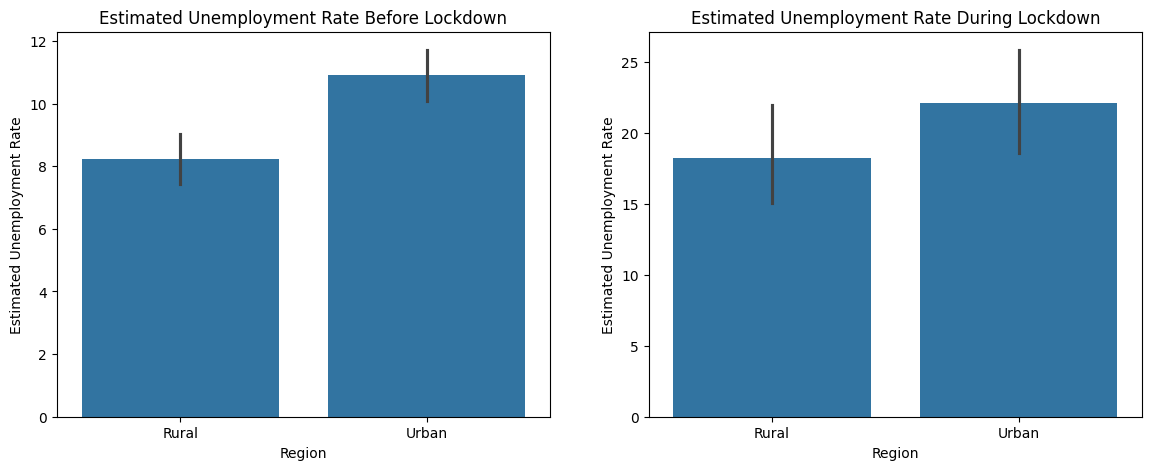

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
# Chart - 1 Bar plot visualization code for Region wise Estimated Unemployment Rate before and during lockdown
def urb_vs_urd_r():
  # Create a figure with two subplots side by side.
  plt.figure(figsize=(14, 5))

  # Subplot 1: Estimated Unemployment Rate Before Lockdown
  plt.subplot(1, 2, 1)

  # Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
  sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)

  # Set labels and title for the first subplot.
  plt.xlabel("Region", fontsize=10)
  plt.ylabel('Estimated Unemployment Rate', fontsize=10)
  plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

  # Subplot 2: Estimated Unemployment Rate During Lockdown
  plt.subplot(1, 2, 2)

  # Create a bar plot for the Estimated Unemployment Rate during lockdown.
  sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)

  # Set labels and title for the second subplot.
  plt.xlabel("Region", fontsize=10)
  plt.ylabel('Estimated Unemployment Rate', fontsize=10)
  plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

  # Display the subplots side by side.
  plt.show()

urb_vs_urd_r()

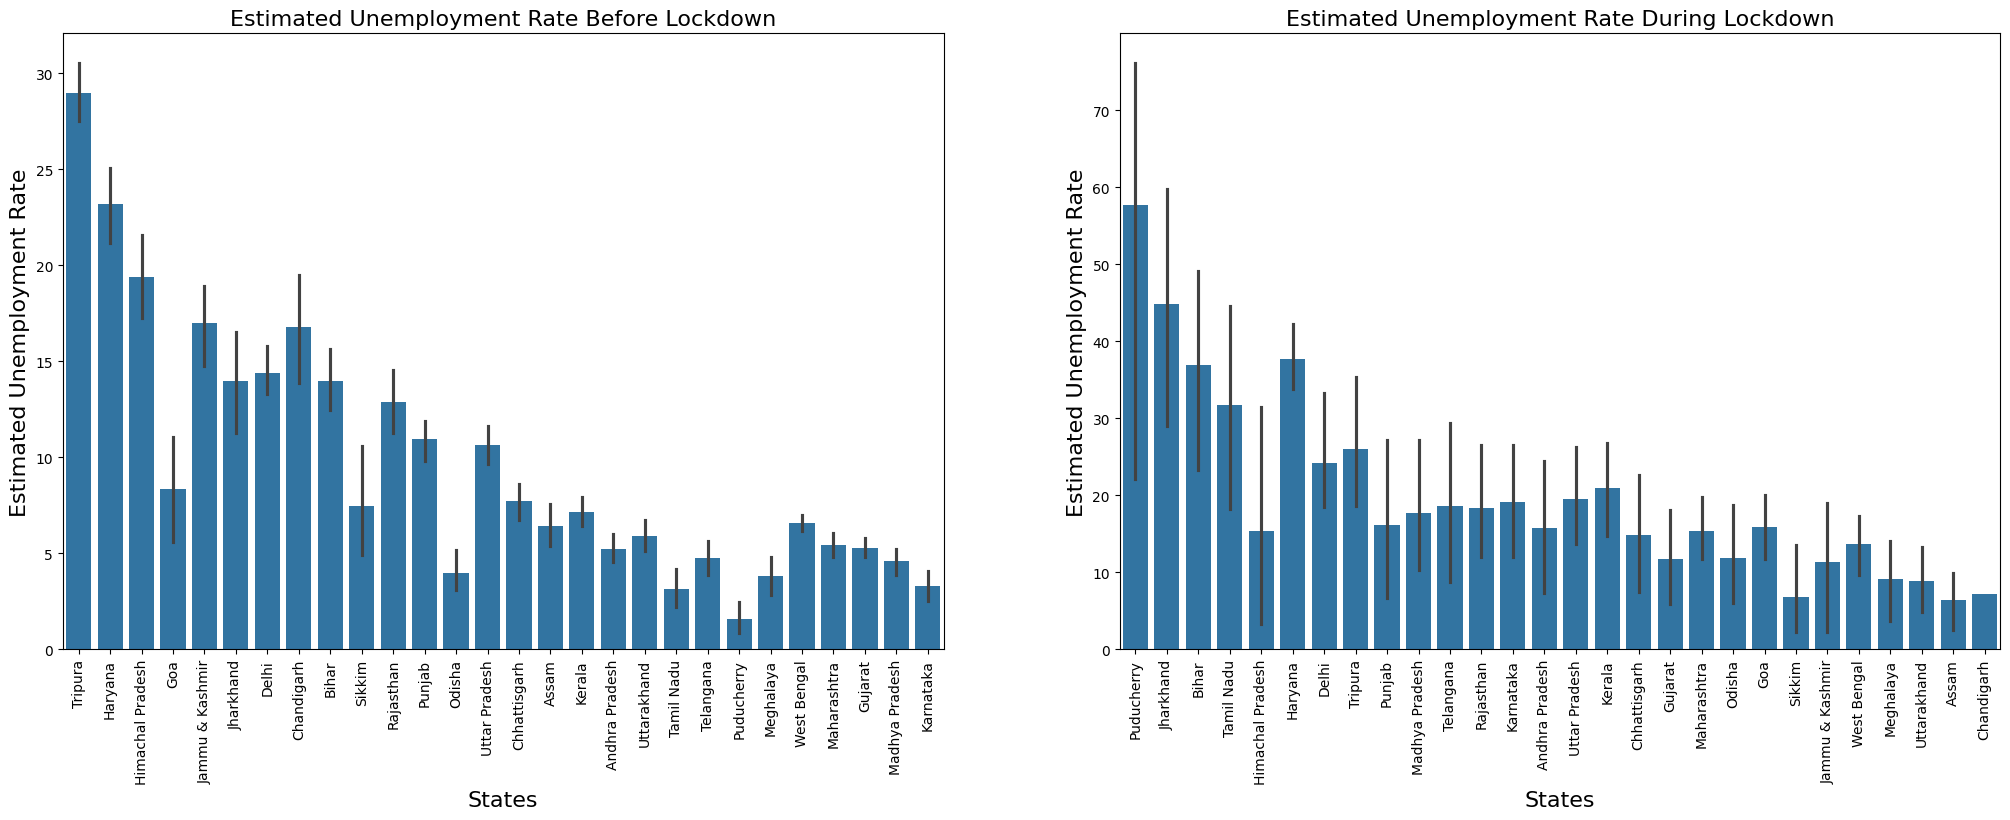

In [60]:
# Create a figure with two subplots side by side.
def urb_vs_urd_s():
  plt.figure(figsize=(25, 8))

  # Subplot 1: Estimated Unemployment Rate Before Lockdown
  plt.subplot(1, 2, 1)

  # Set the title for the first subplot.
  plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

  # Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
  sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
  plt.xticks(rotation=90)
  plt.xlabel('States', fontsize=16)
  plt.ylabel('Estimated Unemployment Rate', fontsize=16)

  # Subplot 2: Estimated Unemployment Rate During Lockdown
  plt.subplot(1, 2, 2)

  # Set the title for the second subplot.
  plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

  # Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
  sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
  plt.xticks(rotation=90)
  plt.xlabel('States', fontsize=16)
  plt.ylabel('Estimated Unemployment Rate', fontsize=16)

  # Display the subplots side by side.
  plt.show()

urb_vs_urd_s()

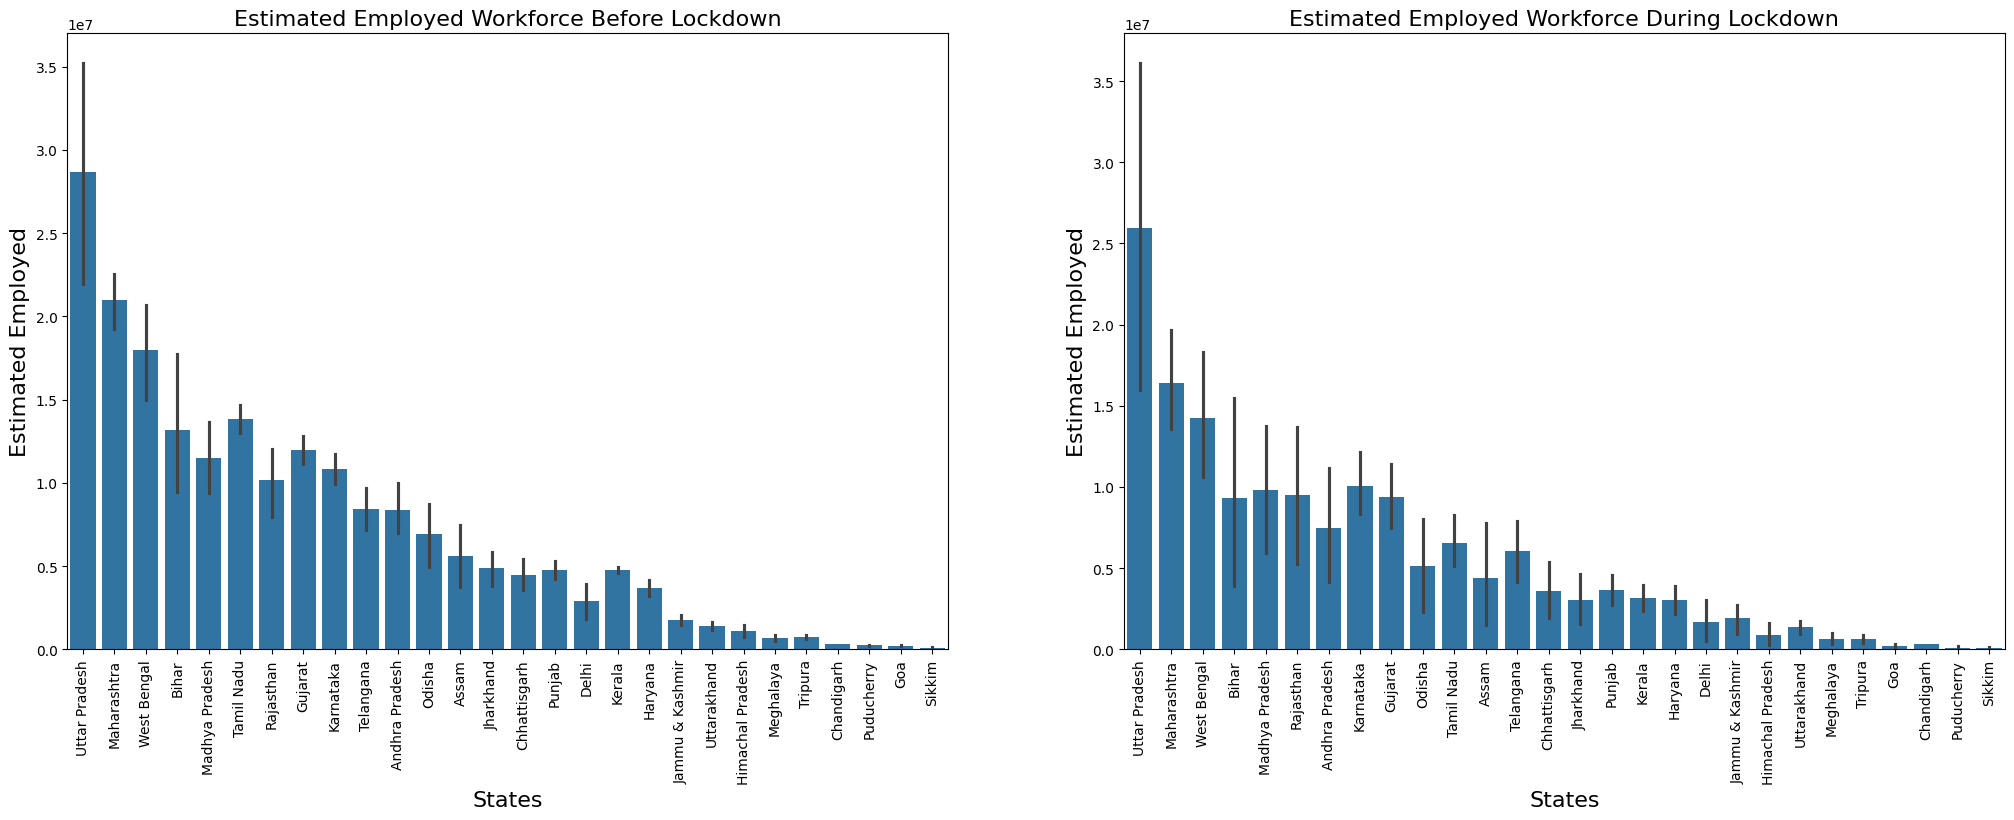

In [61]:
# Create a figure with two subplots side by side.
def ewb_vs_ewd_s():
  plt.figure(figsize=(25, 8))

  # Subplot 1: Estimated Employed Workforce Before Lockdown
  plt.subplot(1, 2, 1)

  # Set the title for the first subplot.
  plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

  # Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
  sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

  # Rotate x-axis labels for better readability.
  plt.xticks(rotation=90)

  # Set labels for the first subplot.
  plt.xlabel('States', fontsize=16)
  plt.ylabel('Estimated Employed', fontsize=16)

  # Subplot 2: Estimated Employed Workforce During Lockdown
  plt.subplot(1, 2, 2)

  # Set the title for the second subplot.
  plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

  # Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
  sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

  # Rotate x-axis labels for better readability.
  plt.xticks(rotation=90)

  # Set labels for the second subplot.
  plt.xlabel('States', fontsize=16)
  plt.ylabel('Estimated Employed', fontsize=16)

  # Display the subplots side by side.
  plt.show()

ewb_vs_ewd_s()